## 1. Imports


In [138]:
import sys
sys.path.append('../')
from scripts.visualization_utils import impact_bar_plots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns;

In [139]:
data_path = '../data/results/test_2_balanced/'
#data_path = '../data/results/june1/'
folders= ['dt','gnb','lgr','gbt']
#olders = ['dt']

## 2. Delayed Impact plots

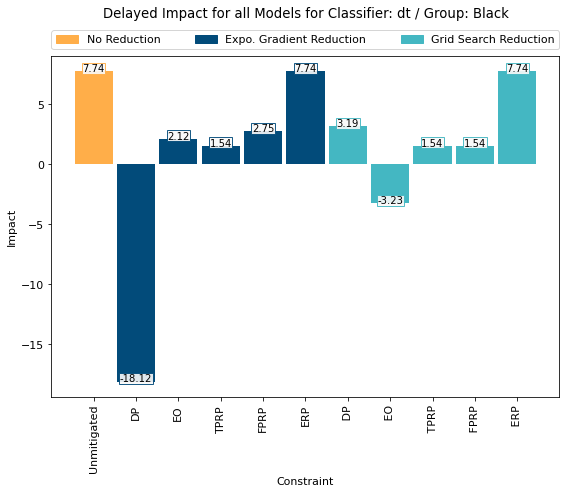

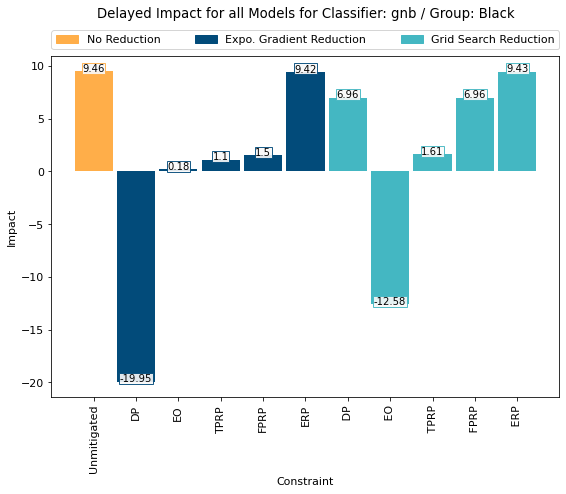

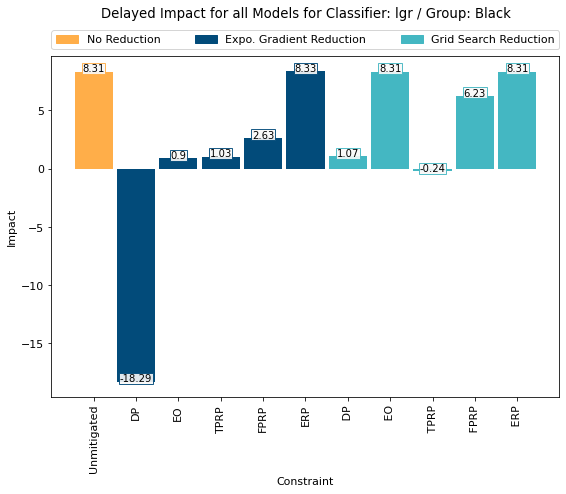

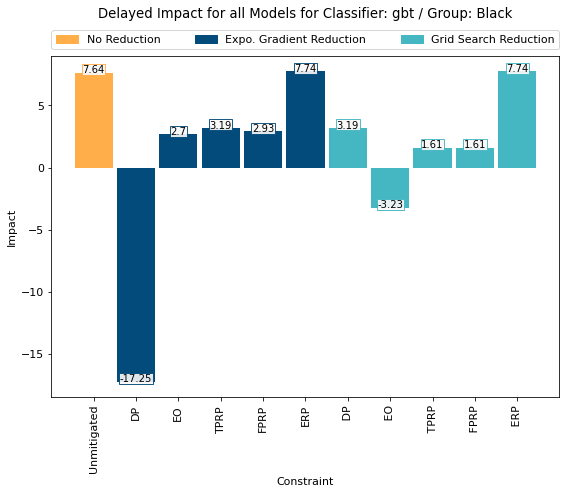

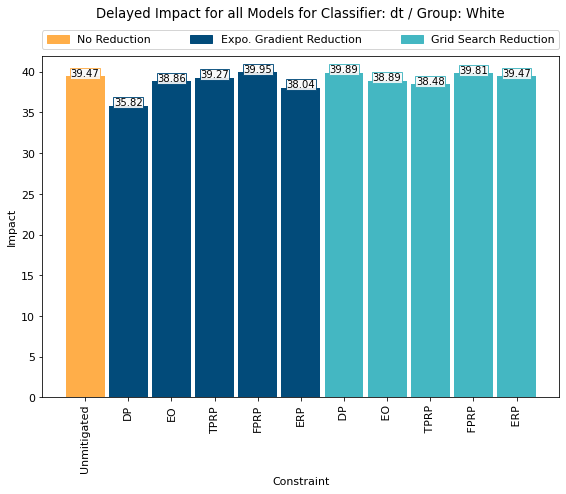

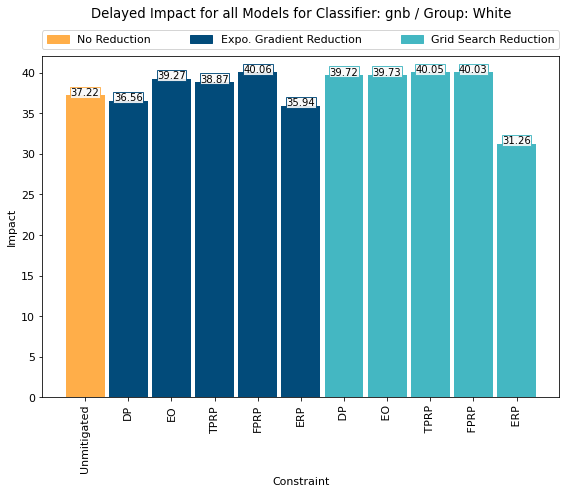

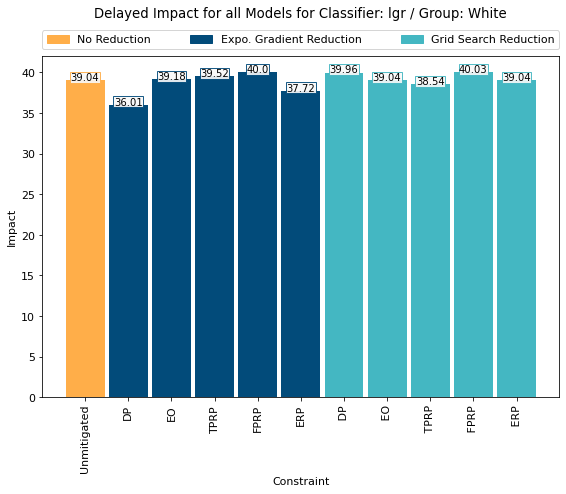

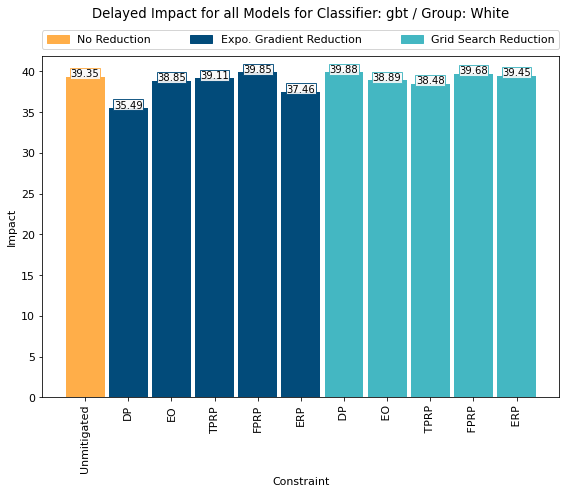

In [140]:
impact_bar_plots(data_path,'Black',folders)
impact_bar_plots(data_path,'White',folders)

## 3. Comparison of Loans Quantitys

In [141]:
# Types Dataframes
classifier_dfs = {}
dfs_b = {}
dfs_w = {}
dfs_eg = {}
dfs_gs = {}

for f in folders:
    path = f'{data_path}{f}/{f}_type_absolute.csv'
    df = pd.read_csv(path)
    df = df.set_index('Category')
    df_black = df.filter(like='B')
    df_white = df.filter(like='W')
    df_eg = pd.concat([df.iloc[:,:4],df.filter(like='eg')],axis=1)
    df_gs = pd.concat([df.iloc[:,:4],df.filter(like='gs')],axis=1)
    
    classifier_dfs[f] = df
    dfs_b[f] = df_black
    dfs_w[f] = df_white
    dfs_eg[f] = df_eg
    dfs_gs[f] = df_gs
    
    
print(dfs_b['dt'])

           egdpB   egeoB  egerpB  egfprpB  egtprpB   gsdpB   gseoB  gserpB  \
Category                                                                     
FN         343.0   692.0  1168.0    720.0    672.0   741.0   554.0  1168.0   
FP        3527.0  1598.0   873.0   1530.0   1659.0  1481.0  2131.0   873.0   
TN        5101.0  7030.0  7755.0   7098.0   6969.0  7147.0  6497.0  7755.0   
TP        4029.0  3680.0  3204.0   3652.0   3700.0  3631.0  3818.0  3204.0   

          gsfprpB  gstprpB   testB  unmitB  
Category                                    
FN          672.0    672.0     0.0  1168.0  
FP         1659.0   1659.0     0.0   873.0  
TN         6969.0   6969.0  8628.0  7755.0  
TP         3700.0   3700.0  4372.0  3204.0  


In [142]:
def visualize_tpfp(dfs = {}):
    for c,df in dfs.items():
        
        df = df.loc[['TP','FP'],:]
        df = df.transpose()
        df['P'] = df['TP']+ df['FP']
        ax = df.plot.bar()
        
        ax.set_title(f'Percentage of TP & FP for all Models for Classifier: {c} \n')
        ax.set_xlabel('Model')
        ax.set_ylabel('Value')


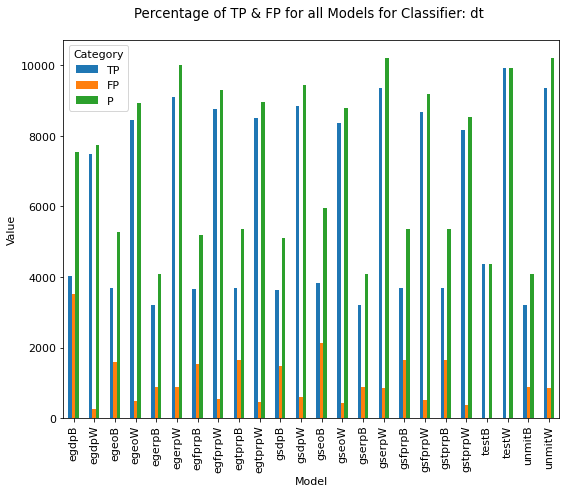

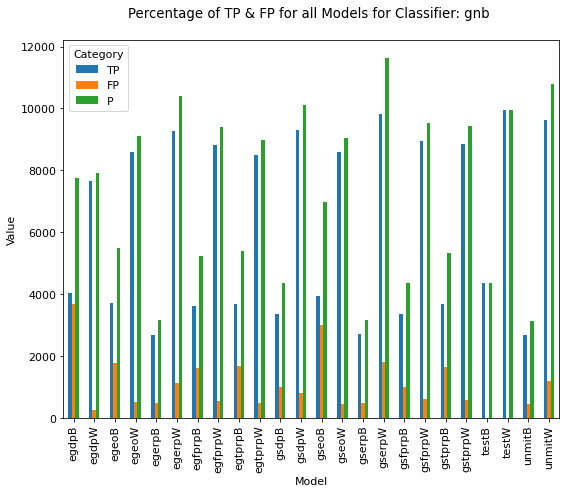

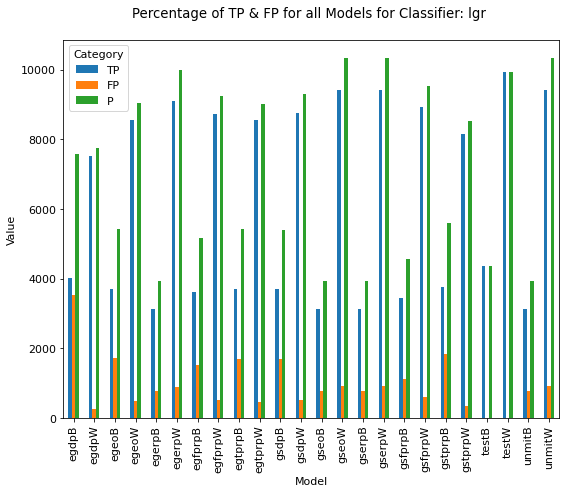

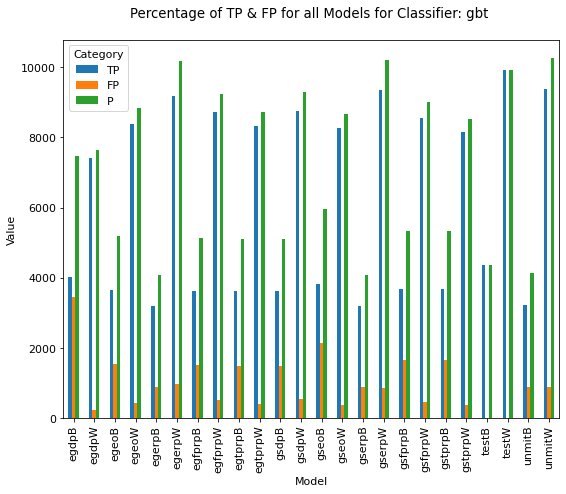

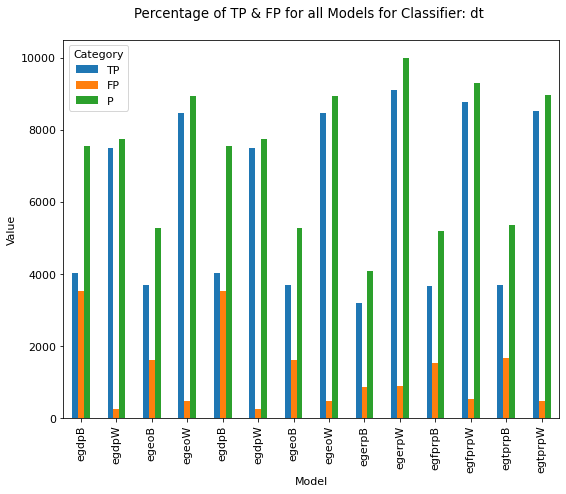

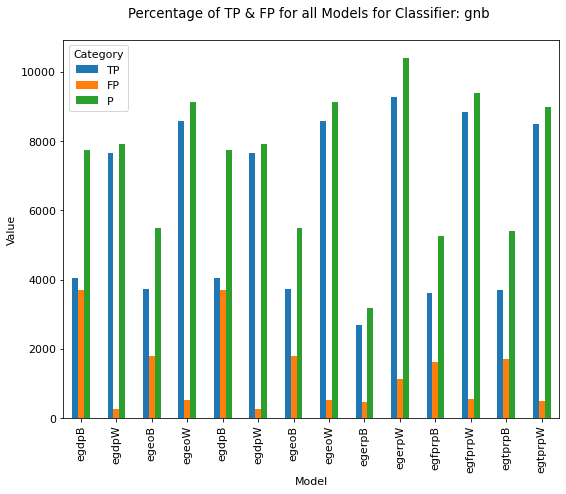

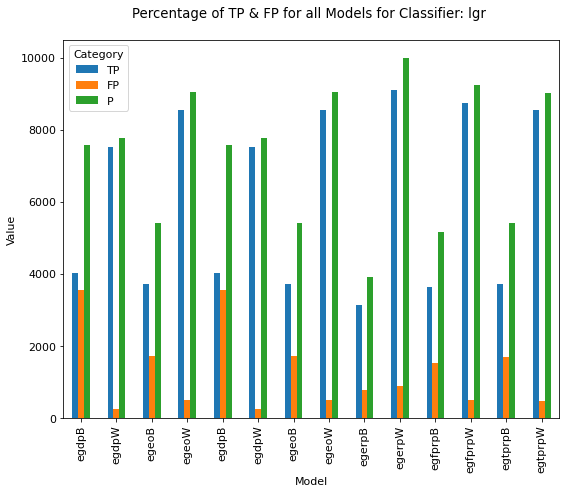

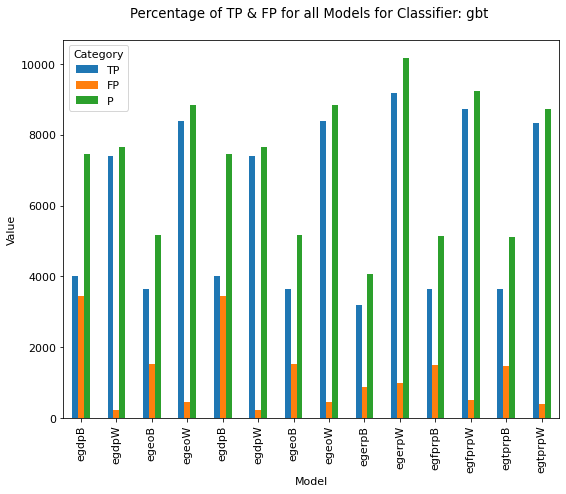

In [143]:
visualize_tpfp(classifier_dfs)
visualize_tpfp(dfs_eg)

## 4. MWU p-Test results